This notebook explains how we can go about explore and prepare data for model building.The notebook is structured in the following way 

 - About Dataset
 - Feature Engineering
 - univariate analysis
 - Visualizing Count Vs (Month,Season,Hour,Weekday)
 - Correlation Analysis
 - Preprocessing 
 - Model Building

## About Dataset (Cab booking system)

#### **Overview**

Cab booking system is the process where renting a cab is automated through an app 
throughout a city. Using this app, people can book a cab from one location to another location. 
Being a cab booking app company, exploiting the understanding of cab supply and demand 
could increase the efficiency of their service and enhance user experience by minimizing 
waiting time.

Objective of this project is to combine historical usage pattern along with the open data sources 
like weather data to forecast cab booking demand in a city.

#### **Data Fields**

* datetime - hourly date + timestamp  
* season -  spring, summer,fall,winter 
* holiday - whether the day is considered a holiday
* workingday - whether the day is neither a weekend nor holiday
* weather 
            *' Clear + Few clouds' 
            *' Light Snow, Light Rain'
            *' Mist + Cloudy '
            *' Heavy Rain + Thunderstorm '
* temp - temperature in Celsius
* atemp - "feels like" temperature in Celsius
* humidity - relative humidity
* windspeed - wind speed
* count - number of total booking (Dependent Variable)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings("ignore")

In [2]:
# x is independent features 
# y is dependent feature(label)
X_train = pd.read_csv("train.csv")
X_test = pd.read_csv("test.csv")
y_train = pd.read_csv("train_label.csv",header=None,names=["count"])
y_test = pd.read_csv("test_label.csv",header=None)

In [3]:
df = pd.concat([X_train , y_train], axis=1) #df is training data
df_copy =df.copy()

In [4]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184


## Feature Engineering

As we see from the above results, the columns "season","holiday","workingday" and "weather" should be of "categorical" data type.But the current data type is "int" for those columns. Let us transform the dataset in the following ways so that we can get started up with our EDA

 - Create new columns "date,"hour","weekDay","month" from "datetime"
   column.
 - Coerce the datatype of "season","holiday","workingday" and weather to category.
 - Drop the datetime column as we already extracted useful features from it.

In [5]:
import calendar
from datetime import datetime
df["date"] = df.datetime.apply(lambda x : x.split()[0])
df["hour"] = df.datetime.apply(lambda x : x.split()[1].split(":")[0])
df["weekday"] = df.date.apply(lambda dateString : calendar.day_name[datetime.strptime(dateString,"%m/%d/%Y").weekday()])
df["month"] = df.date.apply(lambda dateString : calendar.month_name[datetime.strptime(dateString,"%m/%d/%Y").month])

In [6]:
df["hour"] = df["hour"].apply(lambda x: x.zfill(2))

In [7]:
df = df.drop(["datetime"],axis=1)

In [8]:
df.head(10)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,date,hour,weekday,month
0,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504,5/2/2012,19,Wednesday,May
1,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5,9/5/2012,04,Wednesday,September
2,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139,1/13/2011,09,Thursday,January
3,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209,11/18/2011,16,Friday,November
4,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184,9/13/2011,13,Tuesday,September
5,Fall,0,1,Clear + Few clouds,33.62,12.120,36,22.0028,791,8/17/2012,17,Friday,August
6,Winter,0,0,Clear + Few clouds,24.60,29.545,73,12.9980,395,10/6/2012,09,Saturday,October
7,Fall,0,1,Clear + Few clouds,21.32,25.000,68,19.0012,5,9/10/2012,04,Monday,September
8,Fall,0,0,"Light Snow, Light Rain",27.06,31.060,61,7.0015,9,7/14/2012,04,Saturday,July
9,Spring,0,0,Clear + Few clouds,12.30,15.150,56,11.0014,78,2/6/2011,18,Sunday,February


In [9]:
df.isna().any()

season        False
holiday       False
workingday    False
weather       False
temp          False
atemp         False
humidity      False
windspeed     False
count         False
date          False
hour          False
weekday       False
month         False
dtype: bool

## Univariate analysis

In [10]:
df.season.value_counts()

Summer    2197
Fall      2189
Winter    2186
Spring    2136
Name: season, dtype: int64

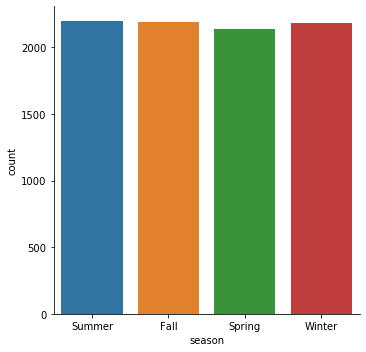

In [11]:
sns.factorplot(x='season',data=df,kind='count',size=5,aspect=1)

In [12]:
#holiday
df.holiday.value_counts()

0    8460
1     248
Name: holiday, dtype: int64

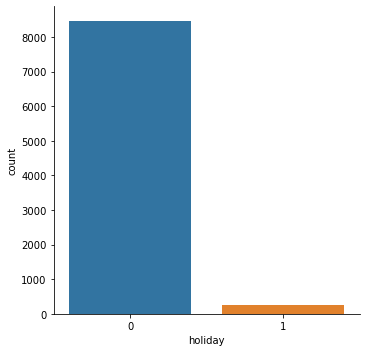

In [13]:
sns.factorplot(x='holiday',data=df,kind='count',size=5,aspect=1)

In [14]:
#weather
df.weather.value_counts()

 Clear + Few clouds            5753
 Mist + Cloudy                 2276
 Light Snow, Light Rain         678
 Heavy Rain + Thunderstorm        1
Name: weather, dtype: int64

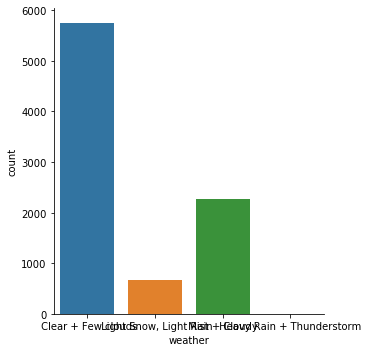

In [15]:
sns.factorplot(x='weather',data=df,kind='count',size=5,aspect=1)

## Visualizing Count Vs (Month,Season,Hour,Weekday)

 - It is quiet obvious that people tend to book cab during summer
   season since it is really conducive to book cab at that
   season.Therefore June, July and August has got relatively higher
   demand for bicycle.
 - On weekdays more people tend to book cab around 7AM-8AM and 5PM-6PM. As we mentioned earlier this can be attributed to regular school and office commuters.
 - Above pattern is not observed on "Saturday" and "Sunday".More people tend to book car between 10AM and 4PM.

[Text(0, 0.5, 'Users Count'),
 Text(0.5, 0, 'Hour Of The Day'),
 Text(0.5, 1.0, 'Average Users Count By Hour Of The Day Across Weekdays'),
 None]

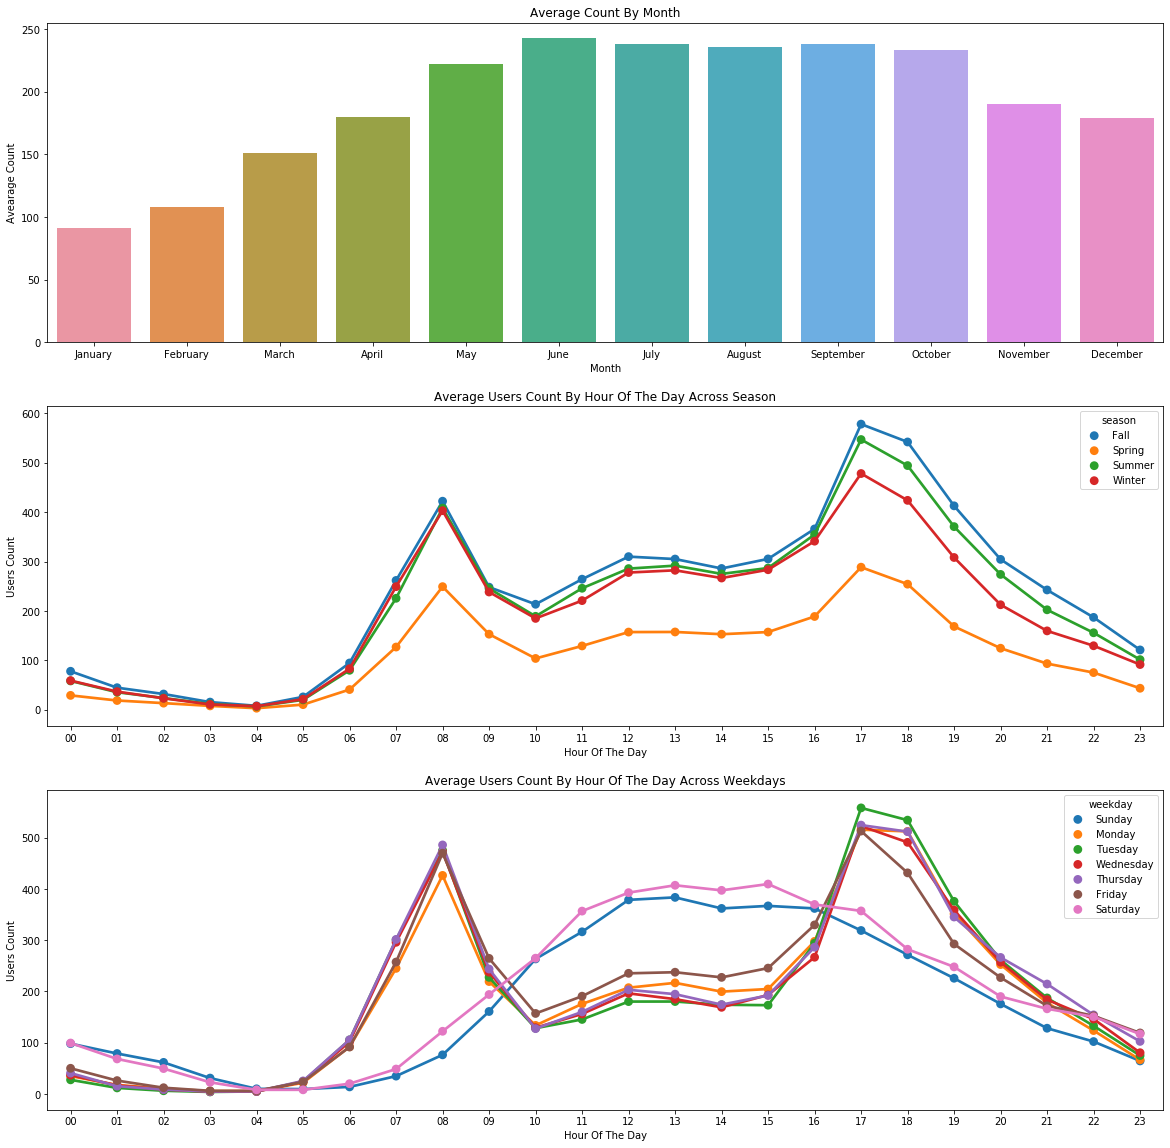

In [16]:
fig,(ax1,ax2,ax3)= plt.subplots(nrows=3)
fig.set_size_inches(20,20)
sortOrder = ["January","February","March","April","May","June","July","August","September","October","November","December"]
hueOrder = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]

monthAggregated = pd.DataFrame(df.groupby("month")["count"].mean()).reset_index()
monthSorted = monthAggregated.sort_values(by="count",ascending=False)
sns.barplot(data=monthSorted,x="month",y="count",ax=ax1,order=sortOrder)
ax1.set(xlabel='Month', ylabel='Avearage Count',title="Average Count By Month")

hourAggregated = pd.DataFrame(df.groupby(["hour","season"],sort=True)["count"].mean()).reset_index()
sns.pointplot(x=hourAggregated["hour"], y=hourAggregated["count"],hue=hourAggregated["season"], data=hourAggregated, join=True,ax=ax2)
ax2.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Season",label='big')

hourAggregated = pd.DataFrame(df.groupby(["hour","weekday"],sort=True)["count"].mean()).reset_index()
sns.pointplot(x=hourAggregated["hour"], y=hourAggregated["count"],hue=hourAggregated["weekday"],hue_order=hueOrder, data=hourAggregated, join=True,ax=ax3)
ax3.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Weekdays",label='big')

## Outliers Analysis

At first look, "count" variable contains lot of outlier data points which skews the distribution towards right (as there are more data points beyond Outer Quartile Limit).But in addition to that, following inferences can also been made from the simple boxplots given below.

 - Spring season has got relatively lower count.The dip in median value
   in boxplot gives evidence for it.
 - The boxplot with "Hour Of The Day" is quiet interesting.The median value are relatively higher at 7AM - 8AM and 5PM - 6PM. It can be attributed to regular school and office users at that time. 
 - Most of the outlier points are mainly contributed from "Working Day" than "Non Working Day". It is quiet visible from 
 figure 4.

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Working Day'),
 Text(0.5, 1.0, 'Box Plot On Count Across Working Day')]

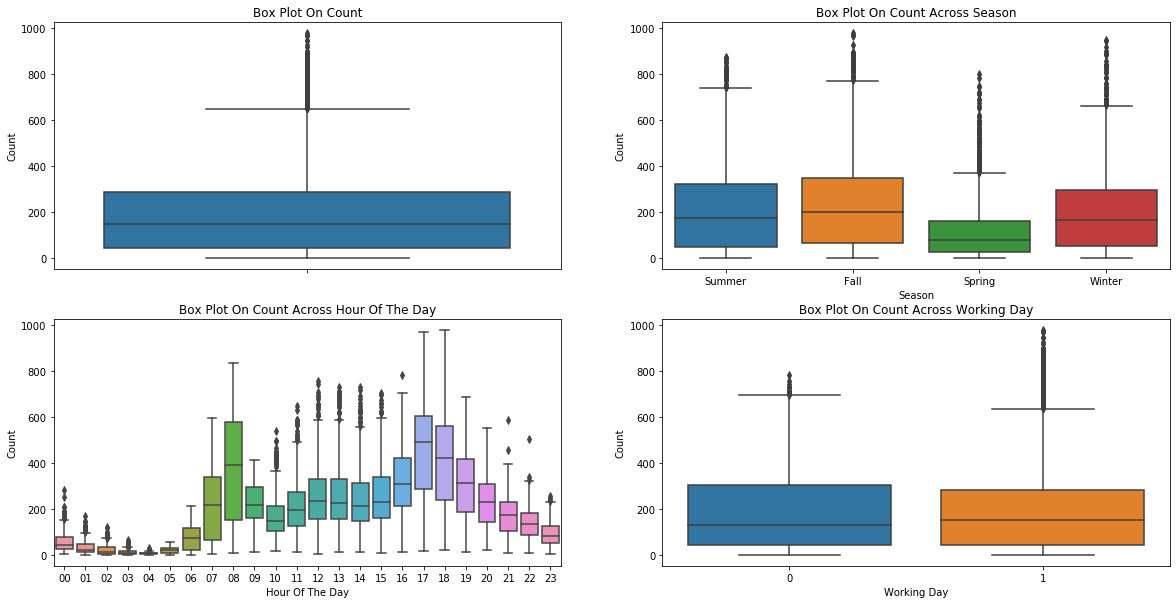

In [17]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(20, 10)
sns.boxplot(data=df,y="count",orient="v",ax=axes[0][0])
sns.boxplot(data=df,y="count",x="season",orient="v",ax=axes[0][1])
sns.boxplot(data=df,y="count",x="hour",orient="v",ax=axes[1][0])
sns.boxplot(data=df,y="count",x="workingday",orient="v",ax=axes[1][1])

axes[0][0].set(ylabel='Count',title="Box Plot On Count")
axes[0][1].set(xlabel='Season', ylabel='Count',title="Box Plot On Count Across Season")
axes[1][0].set(xlabel='Hour Of The Day', ylabel='Count',title="Box Plot On Count Across Hour Of The Day")
axes[1][1].set(xlabel='Working Day', ylabel='Count',title="Box Plot On Count Across Working Day")

#### **Lets Remove Outliers In The Count Column**

In [18]:
df = df[np.abs(df["count"]-df["count"].mean())<=(3*df["count"].std())]

## Correlation Analysis

One common to understand how a dependent variable is influenced by features (numerical) is to fibd a correlation matrix between them. Lets plot a correlation plot between "count" and ["temp","atemp","humidity","windspeed"].

 - temp and humidity features has got positive and negative correlation
   with count respectively.Although the correlation between them are not
   very prominent still the count variable has got little dependency on
   "temp" and "humidity".
 - windspeed is not gonna be really useful numerical feature and it is visible from it correlation value with "count"
 - "atemp" is variable is not taken into since "atemp" and "temp" has got strong correlation with each other. During model building any one of the variable has to be dropped since they will exhibit multicollinearity in the data.

Regression plot in seaborn is one useful way to depict the relationship between two features. Here we consider "count" vs "temp", "humidity", "windspeed".

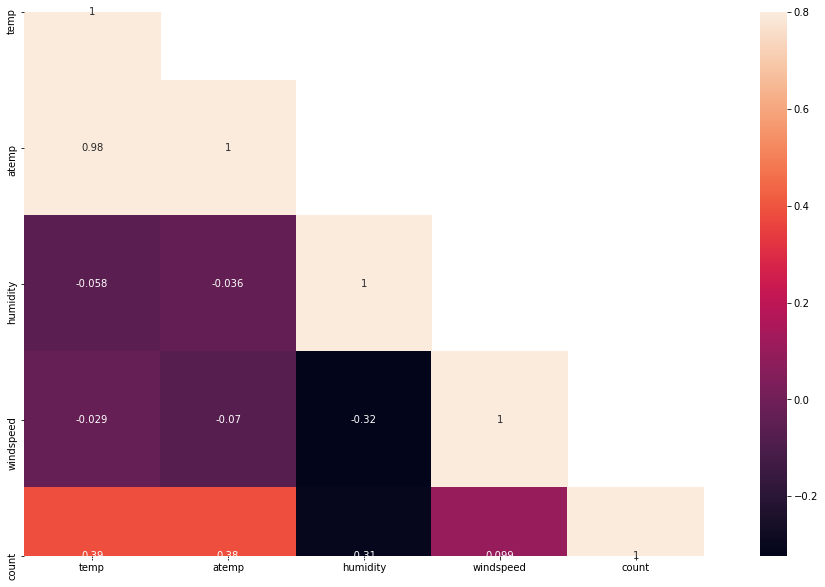

In [19]:
corrMatt = df[["temp","atemp","humidity","windspeed","count"]].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

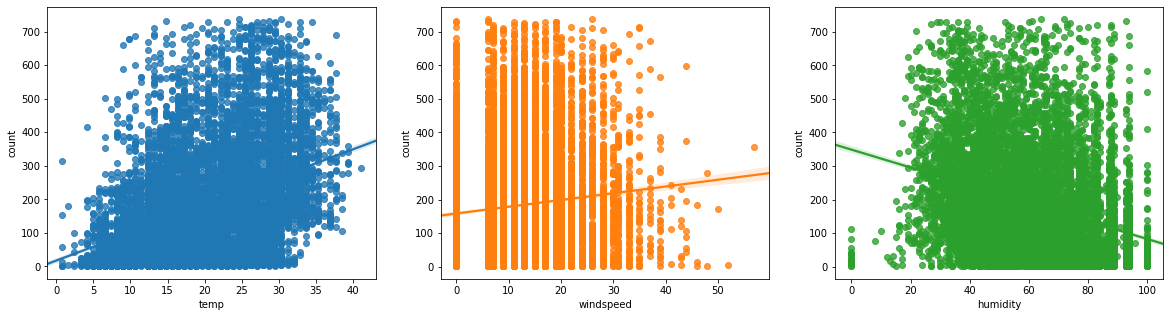

In [20]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(20, 5)
sns.regplot(x="temp", y="count", data=df,ax=ax1)
sns.regplot(x="windspeed", y="count", data=df,ax=ax2)
sns.regplot(x="humidity", y="count", data=df,ax=ax3)

## Visualizing Distribution Of Data
As it is visible from the below figures that "count" variable is skewed towards right. It is desirable to have Normal distribution as most of the machine learning techniques require dependent variable to be Normal. One possible solution is to take log transformation on "count" variable after removing outlier data points. After the transformation the data looks lot better but still not ideally following normal distribution.

[Text(0.5, 1, 'Theoretical quantiles')]

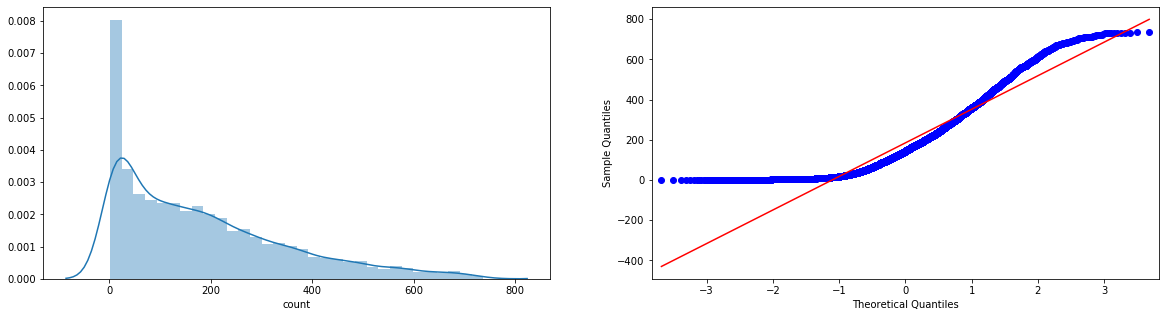

In [21]:
from statsmodels.graphics.gofplots import qqplot

fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,5))
sns.distplot(df['count'], ax=ax1)
ax.set(title="Distribution after log of count")
qqplot(df['count'], line='s', ax=ax2)
ax.set(title="Theoretical quantiles")

In [22]:
import math
df['count'] = df['count'].transform(lambda x: math.log(x))

[Text(0.5, 1, 'Theoretical quantiles')]

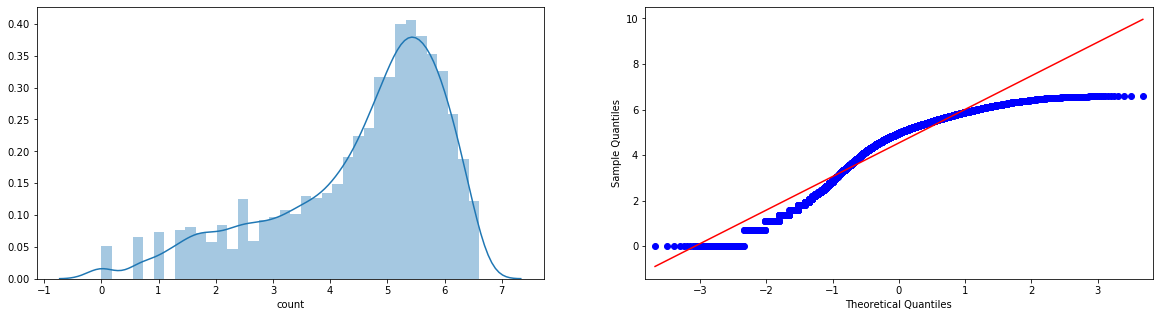

In [23]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,5))
sns.distplot(df['count'], ax=ax1)
ax.set(title="Distribution after log of count")
qqplot(df['count'], line='s', ax=ax2)
ax.set(title="Theoretical quantiles")

In [24]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,date,hour,weekday,month
0,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,6.222576,5/2/2012,19,Wednesday,May
1,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,1.609438,9/5/2012,04,Wednesday,September
2,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,4.934474,1/13/2011,09,Thursday,January
3,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,5.342334,11/18/2011,16,Friday,November
4,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,5.214936,9/13/2011,13,Tuesday,September


**Combine Train And Test**

In [25]:
data = df_copy.append(X_test)
data.reset_index(inplace=True)
data.drop('index',inplace=True,axis=1)

In [26]:
data.tail()

,atemp,count,datetime,holiday,humidity,season,temp,weather,windspeed,workingday
10881,22.725,NaN,3/8/2012 3:00,0,63,Spring,18.86,Clear + Few clouds,26.0027,1
10882,17.425,NaN,1/12/2012 12:00,0,81,Spring,13.94,Mist + Cloudy,7.0015,1
10883,22.725,NaN,3/7/2012 22:00,0,59,Spring,18.86,Clear + Few clouds,19.9995,1
10884,21.210,NaN,5/12/2011 5:00,0,94,Summer,17.22,Clear + Few clouds,8.9981,1
10885,34.850,NaN,7/18/2012 16:00,0,66,Fall,30.34,Clear + Few clouds,16.9979,1


In [27]:
data["date"] = data.datetime.apply(lambda x : x.split()[0])
data["hour"] = data.datetime.apply(lambda x : x.split()[1].split(":")[0]).astype("int")
data["year"] = data.datetime.apply(lambda x : x.split()[0].split("/")[2])
data["weekday"] = data.date.apply(lambda dateString : datetime.strptime(dateString,"%m/%d/%Y").weekday())
data["month"] = data.date.apply(lambda dateString : datetime.strptime(dateString,"%m/%d/%Y").month)

In [28]:
data.head()

,atemp,count,datetime,holiday,humidity,season,temp,weather,windspeed,workingday,date,hour,year,weekday,month
0,25.760,504.0,5/2/2012 19:00,0,77,Summer,22.14,Clear + Few clouds,16.9979,1,5/2/2012,19,2012,2,5
1,33.335,5.0,9/5/2012 4:00,0,79,Fall,28.70,Clear + Few clouds,19.0012,1,9/5/2012,4,2012,2,9
2,6.060,139.0,1/13/2011 9:00,0,50,Spring,5.74,Clear + Few clouds,22.0028,1,1/13/2011,9,2011,3,1
3,16.665,209.0,11/18/2011 16:00,0,29,Winter,13.94,Clear + Few clouds,8.9981,1,11/18/2011,16,2011,4,11
4,33.335,184.0,9/13/2011 13:00,0,51,Fall,30.34,Clear + Few clouds,19.0012,1,9/13/2011,13,2011,1,9


## Preprocessing 

In [29]:
from sklearn.preprocessing import minmax_scale
data[['atemp','humidity','temp','windspeed']] = minmax_scale(data[['atemp','humidity','temp','windspeed']])

In [30]:
data.head()

,atemp,count,datetime,holiday,humidity,season,temp,weather,windspeed,workingday,date,hour,year,weekday,month
0,0.559347,504.0,5/2/2012 19:00,0,0.77,Summer,0.530612,Clear + Few clouds,0.298225,1,5/2/2012,19,2012,2,5
1,0.728829,5.0,9/5/2012 4:00,0,0.79,Fall,0.693878,Clear + Few clouds,0.333373,1,9/5/2012,4,2012,2,9
2,0.118581,139.0,1/13/2011 9:00,0,0.50,Spring,0.122449,Clear + Few clouds,0.386035,1,1/13/2011,9,2011,3,1
3,0.355856,209.0,11/18/2011 16:00,0,0.29,Winter,0.326531,Clear + Few clouds,0.157870,1,11/18/2011,16,2011,4,11
4,0.728829,184.0,9/13/2011 13:00,0,0.51,Fall,0.734694,Clear + Few clouds,0.333373,1,9/13/2011,13,2011,1,9


In [31]:
data_dummy = data

def dummify_dataset(df, column):       
    df = pd.concat([df, pd.get_dummies(df[column], prefix=column, drop_first=True)],axis=1)
    df = df.drop([column], axis=1)
    return df

columns_to_dummify = ['season', 'month', 'hour', 'holiday', 'weekday', 'workingday', 'weather']
for column in columns_to_dummify:
    data_dummy = dummify_dataset(data_dummy, column)

In [32]:
data_dummy.head()

,atemp,count,datetime,humidity,temp,windspeed,date,year,season_Spring,season_Summer,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weather_ Heavy Rain + Thunderstorm,"weather_ Light Snow, Light Rain",weather_ Mist + Cloudy
0,0.559347,504.0,5/2/2012 19:00,0.77,0.530612,0.298225,5/2/2012,2012,0,1,...,0,1,0,0,0,0,1,0,0,0
1,0.728829,5.0,9/5/2012 4:00,0.79,0.693878,0.333373,9/5/2012,2012,0,0,...,0,1,0,0,0,0,1,0,0,0
2,0.118581,139.0,1/13/2011 9:00,0.50,0.122449,0.386035,1/13/2011,2011,1,0,...,0,0,1,0,0,0,1,0,0,0
3,0.355856,209.0,11/18/2011 16:00,0.29,0.326531,0.157870,11/18/2011,2011,0,0,...,0,0,0,1,0,0,1,0,0,0
4,0.728829,184.0,9/13/2011 13:00,0.51,0.734694,0.333373,9/13/2011,2011,0,0,...,1,0,0,0,0,0,1,0,0,0


In [33]:
data_dummy = data_dummy.drop(["atemp"],axis=1)

In [34]:
traindata = data_dummy[pd.notnull(data['count'])]
testdata = data_dummy[~pd.notnull(data['count'])]
traindata.reset_index(drop=True)

,count,datetime,humidity,temp,windspeed,date,year,season_Spring,season_Summer,season_Winter,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weather_ Heavy Rain + Thunderstorm,"weather_ Light Snow, Light Rain",weather_ Mist + Cloudy
0,504.0,5/2/2012 19:00,0.77,0.530612,0.298225,5/2/2012,2012,0,1,0,...,0,1,0,0,0,0,1,0,0,0
1,5.0,9/5/2012 4:00,0.79,0.693878,0.333373,9/5/2012,2012,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,139.0,1/13/2011 9:00,0.50,0.122449,0.386035,1/13/2011,2011,1,0,0,...,0,0,1,0,0,0,1,0,0,0
3,209.0,11/18/2011 16:00,0.29,0.326531,0.157870,11/18/2011,2011,0,0,1,...,0,0,0,1,0,0,1,0,0,0
4,184.0,9/13/2011 13:00,0.51,0.734694,0.333373,9/13/2011,2011,0,0,0,...,1,0,0,0,0,0,1,0,0,0
5,791.0,8/17/2012 17:00,0.36,0.816327,0.386035,8/17/2012,2012,0,0,0,...,0,0,0,1,0,0,1,0,0,0
6,395.0,10/6/2012 9:00,0.73,0.591837,0.228047,10/6/2012,2012,0,0,1,...,0,0,0,0,1,0,0,0,0,0
7,5.0,9/10/2012 4:00,0.68,0.510204,0.333373,9/10/2012,2012,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8,9.0,7/14/2012 4:00,0.61,0.653061,0.122840,7/14/2012,2012,0,0,0,...,0,0,0,0,1,0,0,0,1,0
9,78.0,2/6/2011 18:00,0.56,0.285714,0.193018,2/6/2011,2011,1,0,0,...,0,0,0,0,0,1,0,0,0,0


**Dropping  Unncessary Variables**

In [35]:
X_new_train = traindata.drop(["count","datetime","date"],axis=1)#X_new_train IS NORMALIZED X_train
X_new_test = testdata.drop(["count","datetime","date"],axis=1)#X_new_test is NORMALIZED X_test

In [36]:
X_new_train.head()

,humidity,temp,windspeed,year,season_Spring,season_Summer,season_Winter,month_2,month_3,month_4,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weather_ Heavy Rain + Thunderstorm,"weather_ Light Snow, Light Rain",weather_ Mist + Cloudy
0,0.77,0.530612,0.298225,2012,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,0.79,0.693878,0.333373,2012,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,0.50,0.122449,0.386035,2011,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,0.29,0.326531,0.157870,2011,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,0.51,0.734694,0.333373,2011,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [37]:
X_new_test.head()

,humidity,temp,windspeed,year,season_Spring,season_Summer,season_Winter,month_2,month_3,month_4,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weather_ Heavy Rain + Thunderstorm,"weather_ Light Snow, Light Rain",weather_ Mist + Cloudy
8708,0.48,0.510204,0.614083,2012,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
8709,0.64,0.571429,0.122840,2012,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8710,1.00,0.265306,0.491243,2011,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
8711,0.83,0.612245,0.000000,2011,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,1
8712,0.43,0.612245,0.421065,2012,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


## Model building

In [38]:
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_log_error,make_scorer # for regression
from sklearn import model_selection

In [39]:
def rmsle(y_test,test_pred):
    return (np.sqrt(mean_squared_log_error(y_test,test_pred)))

In [40]:
rmsle_= make_scorer(rmsle)

In [41]:
models=[RandomForestRegressor(),AdaBoostRegressor(),SVR(),KNeighborsRegressor(),ExtraTreesRegressor()]
model_names=['RandomForestRegressor','AdaBoostRegressor','SVR','KNeighborsRegressor',"ExtraTreesRegressor"]
rmsle=[]
d={}
def test_algorithms(model):
    kfold = model_selection.KFold(n_splits=10, random_state=0)
    predicted = model_selection.cross_val_score(model, X_new_train, np.log(y_train), cv=kfold, scoring=rmsle_)
    rmsle.append(predicted.mean())

In [42]:
for model in models:
    test_algorithms(model)
d={'Modelling Algo':model_names,'CROSS VAL RMSLE':rmsle}

In [43]:
rmsle_frame=pd.DataFrame(d)
rmsle_frame

,Modelling Algo,CROSS VAL RMSLE
0,RandomForestRegressor,0.135420
1,AdaBoostRegressor,0.253651
2,SVR,0.168895
3,KNeighborsRegressor,0.187698
4,ExtraTreesRegressor,0.137368


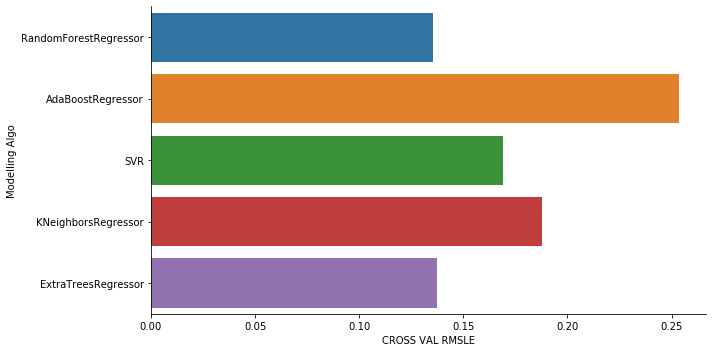

In [44]:
import seaborn as sns
sns.factorplot(y='Modelling Algo',x='CROSS VAL RMSLE',data=rmsle_frame,kind='bar',size=5,aspect=2)

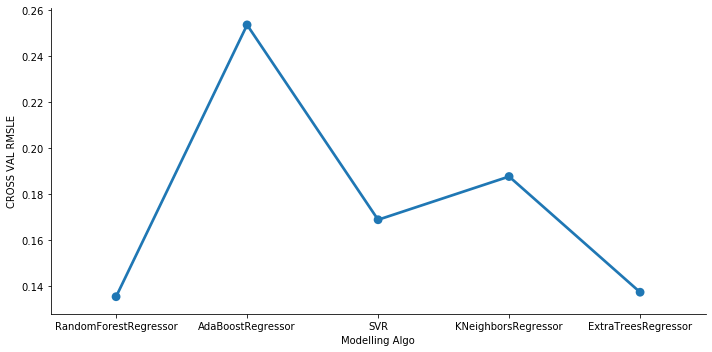

In [45]:
sns.factorplot(x='Modelling Algo',y='CROSS VAL RMSLE',data=rmsle_frame,kind='point',size=5,aspect=2)

In [46]:
clf=RandomForestRegressor()
clf.fit(X_new_train,np.log(y_train))
test_pred=clf.predict(X_new_test)

In [47]:
print ("RMSLE Value For RandomForestRegressor : ",np.sqrt(mean_squared_log_error(np.log(y_test),test_pred)))

RMSLE Value For RandomForestRegressor :  0.1478022668992332


####  NOW RANDOM FOREST REGRESSOR GIVES THE LEAST RMSLE.